In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics import mutual_info_score, adjusted_rand_score

In [3]:
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

In [4]:
# 1. Check for missing values and data types
print("\n--- Missing Values ---")
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())


--- Missing Values ---
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [5]:

print("\n--- Data Types ---")
print(customers.dtypes)
print(products.dtypes)
print(transactions.dtypes)


--- Data Types ---
CustomerID      object
CustomerName    object
Region          object
SignupDate      object
dtype: object
ProductID       object
ProductName     object
Category        object
Price          float64
dtype: object
TransactionID       object
CustomerID          object
ProductID           object
TransactionDate     object
Quantity             int64
TotalValue         float64
Price              float64
dtype: object


In [39]:
# Merge customer and transaction data
customer_transactions = transactions.merge(customers, on='CustomerID')
customer_transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15


In [56]:
# Encode the Region column to numerical values for clustering
label_encoder = LabelEncoder()
customer_transactions['RegionEncoded'] = label_encoder.fit_transform(customer_transactions['Region'])

# Prepare data for clustering
# Using RegionEncoded and TotalValue for regional spend-based clustering
customer_features = customer_transactions.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum'
}).reset_index()


customer_features = customer_features.merge(customers[['CustomerID', 'Region']], on='CustomerID')
customer_features = pd.get_dummies(customer_features, columns=['Region'], drop_first=True)



In [68]:

# Standardize the data
scaler = StandardScaler()
clustering_features = scaler.fit_transform(clustering_data[['RegionEncoded', 'TotalValue']])

# Determine the optimal number of clusters using Davies-Bouldin Index
db_scores = []
cluster_range = range(2, 11)
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(clustering_features)
    db_score = davies_bouldin_score(clustering_features, labels)
    db_scores.append(db_score)


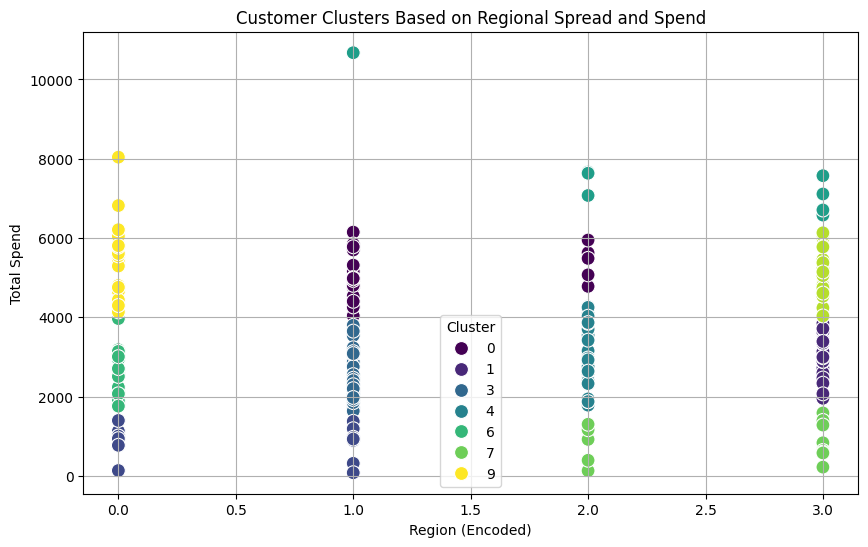

(10, 0.7150859845596994)

In [69]:

# Find the optimal number of clusters (minimum DB index value)
optimal_k = cluster_range[db_scores.index(min(db_scores))]

# Perform clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clustering_data['Cluster'] = kmeans.fit_predict(clustering_features)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=clustering_data['RegionEncoded'],
    y=clustering_data['TotalValue'],
    hue=clustering_data['Cluster'],
    palette='viridis',
    s=100
)
plt.title('Customer Clusters Based on Regional Spread and Spend')
plt.xlabel('Region (Encoded)')
plt.ylabel('Total Spend')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

optimal_k, min(db_scores)

In [71]:
customer_features.to_csv('Kunj_Shukla_clustering.csv', index=False)